# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
df_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';') #cada fila corresponde a un pedido en la aplicación Instacart
df_products = pd.read_csv('/datasets/products.csv', sep=';') #cada fila corresponde a un producto único que pueden comprar los clientes.
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';') #contiene número ID que identifica de manera única cada categoría de pasillo de víveres. nombre del pasillo.
df_departments = pd.read_csv('/datasets/departments.csv', sep=';') #contine número ID que identifica de manera única cada departamento de víveres. nombre del departamento.
df_orders_products = pd.read_csv('/datasets/order_products.csv', sep=';') #cada fila corresponde a un artículo pedido en un pedido.

In [3]:
# mostrar información del DataFrame
df_orders.info()
print()
df_orders.isna().sum() #Podemos observar que tenemos 28.819 datos ausentes en la columna 'days_since_prior_order'.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB



order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

In [4]:
# mostrar información del DataFrame
df_products.info()
print()
df_products.isna().sum() #Podemos observar que tenemos 1.258 datos ausentes en la columna 'product_name'.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB



product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [5]:
# mostrar información del DataFrame
df_aisles.info()
print()
df_aisles.isna().sum() #Podemos observar que no tenemos datos ausentes en este DataFrame. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB



aisle_id    0
aisle       0
dtype: int64

In [6]:
# mostrar información del DataFrame
df_departments.info()
print()
df_departments.isna().sum() #Podemos observar que no tenemos datos ausentes en este DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes



department_id    0
department       0
dtype: int64

In [7]:
# mostrar información del DataFrame
df_orders_products.info(show_counts=True)
print()
df_orders_products.isna().sum() #Podemos observar que tenemos 836 datos ausentes en la columna 'add_to_cart_order'.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB



order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Cuando mostre la informacion de cada DataFrame me di cuenta que estan completamente desordenados estan separados por ';' se deben realizar las las correcciones con el parametro 'sep=' en el DataFrame


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto, buena manera de leer los datos y buenas observaciones iniciales
</div>


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print('Total de duplicados en nuestro DataFrame: ', df_orders['order_id'].duplicated().sum()) #Seleccionamos la columna 'order_id' y le aplicamos el metodo 'duplicated()' y 'sum()' para que nos proporcione el total de datos duplicados, ya que es la colummna con datos unicos de cada pedido que realizan los clientes. Por lo cual no deberia tener datos duplicados.

Total de duplicados en nuestro DataFrame:  15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Observamos que existen 15 datos duplicados. por lo cual podemos suponer de que fue un error de la plataforma de pedidos y duplico dichos pedidos o al momentos de registrarse en el dataset se registraron 2 veces. En un caso de la vida real informaria sobre estos datos duplicados ya que se a presentado 15 veces, para que el area encargada verifique la razon de porque la App a duplicado en 15 ocasiones los pedidos. 

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
filtered_mie_2am= df_orders[(df_orders['order_hour_of_day'] == 2) & (df_orders['order_dow'] == 3)] #filtramos el DataFrame 'df_orders', para que solo nos muestre los datos del dia miercoles a las 2:00am
filtered_mie_2am[['order_id', 'order_hour_of_day', 'order_dow']].value_counts().head(16) #Verificamos los datos duplicados en el DataFrame con el metodo 'value_counts', y solo hemos seleccionado las columnas que nos interesan para este analisis.


order_id  order_hour_of_day  order_dow
2845099   2                  3            2
391768    2                  3            2
2282673   2                  3            2
2232988   2                  3            2
1021560   2                  3            2
2160484   2                  3            2
1112182   2                  3            2
2125197   2                  3            2
467134    2                  3            2
408114    2                  3            2
794638    2                  3            2
1286742   2                  3            2
1782114   2                  3            2
1919531   2                  3            2
1918001   2                  3            2
2291746   2                  3            1
dtype: int64

¿Qué sugiere este resultado?
Analizando un poco mejor los datos podemos ver que este inconveniente se presento el dia Miercoles a las 2 de la mañana. de igual forma se le informaria al area encargada para que esten al tanto de esto y verifiquen que fue lo que paso.

In [10]:
# Elimina los pedidos duplicados
df_orders= df_orders.drop_duplicates(subset='order_id').reset_index(drop=True) #eliminamos los datos duplicados en este caso en la columna que nos interesa 'order_id', utilizando el parametro 'subset=', en el metodo 'drop_duplicates' y utilizamos el metodo 'reset_index(drop=True)', para acomodar el indice y borrar el anteior, guardamos los cambios en el DataFrame 'df_orders'

In [11]:
# Vuelve a verificar si hay filas duplicadas
df_orders.duplicated().sum() #Verificamos que efectivamente los datos duplicados se han eliminado.

0

In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
df_orders['order_id'].duplicated().sum() #Verificamos nuevamente pero esta vez directamente en la columna donde estabamos presentando los duplicados 'order_id', efectivamente los datos duplicados se han eliminado.

0

Describe brevemente tus hallazgos y lo que hiciste con ellos

Selecione la columna que contenia los datos duplicados y le aplique el metodo para eliminarlos. Por ultimo verifique que los datos duplicados se eliminaron correctamente.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto, buena manera de encontrar y eliminar las filas duplicadas
</div>


### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print('Total Duplicados: ', df_products.duplicated().sum()) #verificamos si existen duplicados en nuestro DataFrame
print()
print(df_products) #luego de ver que el dataFrame nos arrojo 0 lo imprimimos para verificar los datos y podemos notar de que existen nombres de productos en mayusculas y minuscula. 

Total Duplicados:  0

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            9

In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
print(df_products['department_id'].value_counts()) #Se utilizo el metodo 'value_counts', para verificar cuantas veces se repetian los numeros en la columna 'department_id'.
print()
print('Cantidad total de duplicados: ', df_products['department_id'].duplicated().sum()) #luego sumamos todos los duplicados para que nos de el total existente.
print()
df_products[df_products['department_id'] == 11].head(10) #Este filtrado lo realice simplemente para corroborrar de que los datos 'Duplicados' son duplicados o simplemente se utilizan en este caso para categorizar cada productos en cada departamento y pasillo

11    6564
19    6264
13    5372
7     4366
1     4008
16    3449
17    3085
15    2092
9     1858
4     1684
3     1516
20    1322
21    1258
6     1139
14    1117
18    1081
5     1054
8      972
12     907
2      548
10      38
Name: department_id, dtype: int64

Cantidad total de duplicados:  49673



,product_id,product_name,aisle_id,department_id
5,6,Dry Nose Oil,11,11
12,13,Saline Nasal Mist,11,11
21,22,Fresh Breath Oral Rinse Mild Mint,20,11
23,24,Tri-Vi-Sol® Vitamins A-C-and D Supplement Drop...,47,11
26,27,Complete Spring Water Foaming Antibacterial Ha...,127,11
41,42,Biotin 1000 mcg,47,11
50,51,Sa Extra Hold Mousse Hair Styling,22,11
54,55,Lasting Color Shampoo,22,11
74,75,Hemp Protein- Organic,65,11
87,88,Probiotics High Potency Capsules,47,11


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name']= df_products['product_name'].str.upper() #convertimos todos los nombres de productos a mayusculas con el metodo 'upper()'
print('Total Duplicados: ', df_products['product_name'].duplicated().sum()) #Verificamos nuevamente cuantos duplicados tenemos en los nombres de productos.
print()

#estos filtados que hice desde aca solo los hice para tener una vision mas clara de los puplicados y los erros que tenian.
print(df_products['product_name'].value_counts().head()) #aca simplemente verifique algunos de los nombres de los productos y ver cuantas veces se repetian
print()
print(df_products[df_products['product_name'] == 'GREEN TEA WITH GINSENG AND HONEY']) #Aca simplemente filtramos unos de los productos del el filtrado obtenido anteriormente, nos podemos dar cuanta que este producto se encuenta 2 veces en un departamento y pasillo y 1 vez en otro.


Total Duplicados:  1361

GREEN TEA WITH GINSENG AND HONEY         3
CINNAMON ROLLS WITH ICING                2
MEDITERRANEAN SEA SALT                   2
CREAM OF MUSHROOM SOUP                   2
MOZZARELLA STICKS WITH MARINARA SAUCE    2
Name: product_name, dtype: int64

       product_id                      product_name  aisle_id  department_id
2037         2038  GREEN TEA WITH GINSENG AND HONEY        94              7
5455         5456  GREEN TEA WITH GINSENG AND HONEY        96             20
19813       19814  GREEN TEA WITH GINSENG AND HONEY        94              7


In [16]:
#Revisa si hay nombres duplicados de productos no faltante.
df_products_name= df_products[~df_products['product_name'].isna()] #Aca realizamos el filtrado para que solo nos de los Datos duplicados sin los ausentes.
df_products_name['product_name'].duplicated().sum() #Comprobamos la cantidad de nombres duplicados.

104

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Luego del analisis, pudimos observar de que la columna 'department_id' simplemente es categorica al igual que todas las demas, los valores en esta columna no los consideraria como duplicados ya que los valores en esta columna se repiten varias veces en diferentes productos, simplemente para identificar en que departamento se encuentran lo mismo pasa por la columna 'aisle_id' y 'product_name' simplemente se repiten los valores ya que esta especificando de igual forma en que pasillo de cada departamento se encuentra cada producto. en este caso no se consideran como duplicados ya que si se toman como duplicados podriamos perder la mayor parte de la informacion que tenemos. En el caso de los nombres de los productos pudimos notar de que tienen 104 duplicados pero visualizando de mejor manera nuestro datos pudimos ver de que cada nombre tiene un id unico de identificacion y algunos estan es pasillos y departamentos diferente. porque se pueden tomar como variaciones de dicho producto y que se encuentra en varios departamentos y pasillo. En un caso de la vida real le preguntaria al area encargada sobre el porque hay nombres de productos iguales pero con id unicos para cada uno y estan ubicados en diferentes pasillos y departamentos.  

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Buena manera de revisar los datos, en este caso hay nombres de productos repetidos, pero al tener distintos IDs podemos suponer que se trata del mismo producto pero de distintas marcas
</div>


### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print('Duplicados Totales: ', df_departments.duplicated().sum()) #Verificamos si existen datos duplicados en el DataFrame.
df_departments #Verificamos de igual forma el DataFrame para verificar como estan contemplados los datos en caso de que existan datos con valos en mayuscula y minuscula.

Duplicados Totales:  0


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
df_departments['department_id'].duplicated().sum() #Verificamos si existen valores duplicados en la columna de 'department_id'.

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Simplemente verifique si existian datos duplicados con el metodo 'Duplicated()' e igual imprimi el DataFrame para echarle un ojo a los datos y verificar alguna irregularidad.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print('Duplicados Totales: ', df_aisles.duplicated().sum())
df_aisles #Verificamos de igual forma el DataFrame para verificar como estan contemplados los datos en caso de que existan datos con valos en mayuscula y minuscula o otro valor.

Duplicados Totales:  0


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
df_aisles['aisle_id'].duplicated().sum() #Verificamos si existen duplicados en la columna 'aisle_id'.

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Simplemente verifique si existian datos duplicados con el metodo 'Duplicated()' e igual imprimi el DataFrame para echarle un ojo a los datos y verificar alguna irregularidad.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print('Duplicados Totales: ', df_orders_products.duplicated().sum()) 
df_orders_products

Duplicados Totales:  0


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
df_orders_products['order_id'].value_counts()
print(df_orders_products[df_orders_products['order_id'] == 1959075].head(15)) #Verificamos la columna 'order_id' ya que el metodo value nos arroja datos duplicados.
print()
df_orders_products['product_id'].value_counts()
print(df_orders_products[df_orders_products['product_id'] == 24852].head(15)) #Verificamos la columna 'product_id' ya que el metodo value nos arroja datos duplicados.

        order_id  product_id  add_to_cart_order  reordered
30114    1959075       42828                NaN          1
88193    1959075       11707               19.0          1
225286   1959075       18523                5.0          1
315382   1959075       32689               39.0          1
391656   1959075       39877               41.0          1
404753   1959075       45603               59.0          1
410035   1959075       43182                NaN          1
452071   1959075        8736                NaN          1
505426   1959075       47740                NaN          1
551504   1959075       15693                NaN          1
583941   1959075       11422                NaN          1
594007   1959075       29926               63.0          1
599014   1959075        9421                7.0          1
637315   1959075        7401               48.0          1
654572   1959075       40571                NaN          1

      order_id  product_id  add_to_cart_order  reordere

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Al visualizar los datos de las columnas 'product_id' y 'order_id' nos pudimos dar cuenta de que nos arroja de que existen datos duplicados pero en realidad ocurre el mismo caso que con los pasillos, los nombres de los productos y los departamentos del DataFrame de productos. no podemos eliminar estos 'Duplicados' ya que en realidad no lo son simplemente son pedidos con los diferentes articulos que fue seleccionando el cliente y nuestro DataFrame los tiene registrados de esta forma. Lo que podriamos hacer aca es agrupar los número de ID que identifica de manera única cada pedido, con los respectivos ID de articulos pedidos o no por este cliente, lo que aun no se es si hacer esto vaya a afectar de alguna manera los resultados o de igual forma no es necesario hacerlo eso lo vere mas adelante, por el momento lo dejare hasta aca. Mas adelante justamente realizamos estas recomendaciones de agrupar que di al final de este texto.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto, los últimos dataframes no tienen datos duplicados
</div>


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
df_products['product_name'].isna().sum() #verificamos la suma de cuantos datos ausentes tenemos.

1258

Describe brevemente cuáles son tus hallazgos.

Al realizar nuestro analisis de productos ausentes podemos notar que tenemos 1258 datos Ausentes. 

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
df_products[(df_products['product_name'].isna()) & (df_products['aisle_id'] == 100)] #Verificamos llamando al DataFrame si efectivamente la mayoria de los datos se encuentran en el pasillo ID 100.

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

Si, estan en el pasillo 100. Efectivamente los 1258 datos estan todos en el pasillo con ID 100.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
df_products[(df_products['product_name'].isna()) & (df_products['department_id'] == 21)] #Verificamos llamando al DataFrame si efectivamente la mayoria de los datos se encuentran en el Departamento con ID 21.

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

Si, esta en el departamento 21. Efectivamente los 1258 datos estan todos en el departamento con ID 21.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
df_products[(df_products['aisle_id'] == 100) & (df_products['department_id'] == 21)] #filtramos para revisar unicamente los datos de las columnas 'aisle_id' que sea igual a 100 y la columna 'department_id' que sea igual a 21.

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

Lo unico que puedo notar es que los 1258 efectivamente son de este departamento y pasillo. y lo otro es que este inconveniente de productos ausentes efectivamente se presento con varios productos del mismo pasillo y departamento. En un caso de la vida real indagariamos mas sobre esto con las personas encargadas.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna(value='Unknown', inplace=True) #Realizamos la sustitucion en el Dato ausente.
df_products.isna().sum() #Verificamos que efectivamente ya no tenemos datos ausentes.

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Corregimos los datos Ausentes pasandoles el valor Desconocido 'unknown'.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto, buena manera de encontrar y reemplazar los valores ausentes
</div>


### `orders` data frame

In [28]:
# Encuentra los valores ausentes
df_orders.isna().sum() #verificamos la suma de cuantos datos ausentes tenemos.

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
df_orders[(df_orders['days_since_prior_order'].isna()) & (df_orders['order_number'] == 1)] #Filtamos para verificar si todos los datos ausentes corresponden al primer pedido del cliente.

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478880,2589657,205028,1,0,16,NaN
478881,2222353,141211,1,2,13,NaN
478907,2272807,204154,1,1,15,NaN
478911,2499542,68810,1,4,19,NaN


In [30]:
df_orders['days_since_prior_order'].fillna(value=0, inplace=True) #Realizamos la sustitucion en los Datos ausentes en este caso se que la columna contiene numeros flotantes por esa razon decidi solo sustituir los datos ausentes con un 0.
df_orders.isna().sum() #Verificamos que efectivamente ya no tenemos datos ausentes.

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Al visualizar los datos ausentes vemos que todos estan en la columna 'days_since_prior_order', al verificar si efectivamente todos los datos ausentes en esta columna tenian relacion con el primer pedido del cliente, nos hemos dado cuenta de que, si, efectivamente los 28.817 datos ausentes tienen que ver con el primer pedido del cliente. por esa razon decidimos sustituir cada valor con un 0 ya que si es el primer pedido de ese cliente han transcurrido 0 dias desde su primer pedido.

### `order_products` data frame

In [31]:
# Encuentra los valores ausentes
df_orders_products.isna().sum() #verificamos la suma de cuantos datos ausentes tenemos.

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('Valor minimo: ', df_orders_products['add_to_cart_order'].min()) #obtenemos los valores minimos de la columna
print('Valor maximo: ', df_orders_products['add_to_cart_order'].max()) #obtenemos los valores maximos de la columna

Valor minimo:  1.0
Valor maximo:  64.0


Describe brevemente cuáles son tus hallazgos.

Al recibizar cuales son los valores minimos y maximo en la columna que contiene valores ausentes podemos darnos cuenta que su valor minimo es 1 y su valor maximo es 64. 

In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
add_to_cart_order= df_orders_products[df_orders_products['order_id'] & df_orders_products['add_to_cart_order'].isna()] #guardamos el filtrado de todos los dautos ausentes en la nueva variable, add_to_cart_order.

In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
print('Pedidos con valores ausentes: ')
print()
print(df_orders_products[(df_orders_products['add_to_cart_order'].isna()) & (df_orders_products['order_id'] == 1968313)]) #Filtramos los datos para verificar en uno de los pedidos 'order_id' cuantos 'product_id' contenia dicha orden de pedido.
print()

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
add_to_cart_order.groupby('order_id').head(10) #Agrupamos los Datos ausentes por su Id de pedido con 'groupby' y la columna 'order_id'

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
print('Número de product_id en cada pedido:')
print()
add_to_cart_order['order_id'].value_counts(ascending=True).head() #Contamos cuantos 'product_id' hay en cada 'orden_id' con 'value_counts' y los ordenamos en orden ascendente. para poder visualizar el valor minimo del conteo.

Pedidos con valores ausentes: 

         order_id  product_id  add_to_cart_order  reordered
9926      1968313       43867                NaN          0
251111    1968313       23995                NaN          1
523251    1968313       25824                NaN          0
712578    1968313       42625                NaN          0
1214262   1968313        9327                NaN          0
1244299   1968313       11577                NaN          0
1309886   1968313        2541                NaN          0
2550341   1968313       28232                NaN          0
3217453   1968313       49644                NaN          0
3219261   1968313       41302                NaN          0
3542553   1968313       48443                NaN          0
3719154   1968313       41593                NaN          0
3888634   1968313       29382                NaN          0
4020321   1968313       23180                NaN          0
4376957   1968313        5605                NaN          0
4443007 

2170451    1
2621907    1
1598369    1
1529171    2
1308785    2
Name: order_id, dtype: int64

Describe brevemente cuáles son tus hallazgos.

Agrupamos los datos por 'order_id' y verificamos que el pedido minimo de productos es 1 producto, y el maximo es de 63 productos. no 64 como nos habia arrojado los datos minimo y maximo en primer lugar. lo que pasa es que los datos estaban en tipo float y no int este valor debio haber tenido algo como 63.6 y simplemente al sacar el maximo lo redondeo. De igual forma este dato esta incorrecto dado a que el conteo es por cada producto agregado de 1 en 1. No es correcto ver en este caso que la persona esta agregando 0.6 de un producto.

In [35]:
# Remplaza los valores ausentes en la columna 'add_to_cart_order' con 999 y convierte la columna al tipo entero.
df_orders_products['add_to_cart_order'].fillna(value= 999, inplace=True) #Reemplazamos los valores ausentes con 999 como lo solicitan.
df_orders_products['add_to_cart_order'] = df_orders_products['add_to_cart_order'].astype('int') #convertimos la columna de float a int con 'astype'.
df_orders_products[df_orders_products['add_to_cart_order'] == 999] #Verificamos que se realizaron los cambios correctamente.

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,999,0
9926,1968313,43867,999,0
14394,2926893,11688,999,0
16418,1717990,4142,999,0
30114,1959075,42828,999,1
...,...,...,...,...
4505662,1800005,7411,999,0
4511400,1633337,260,999,0
4517562,404157,9517,999,0
4534112,1673227,17835,999,0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Reemplazamos los valores ausentes del DataFrame por los valores solicitados en el ejercicio. convertimos la columna de float a int y verificamos de que los valores ausentes se hayan agregado correctamente.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto,  buena manera de reemplazar los valores ausentes
</div>


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Segun los datos que hemos analisado actualmente solo contienen 286 pedidos en la App el pedido minimo es de 1 articulo y el pedido maximo que a realizado un cliente a sido de 63 articulos. hemos reemplazado los datos ausentes y eliminado los duplicados en los DataFrame en el cual al eliminar los duplicados en Dataframe de productos perdimos 2.74% de los datos. ya para este punto tenemos todos los DataFrame corregidos para comenzar con el analisis de los mismos.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [36]:
df_orders['order_hour_of_day'].value_counts(ascending=True).sort_index() #Verificamos los datos de la columna 'order_hour_of_day' para ver si sus datos oscilan entre los valores 0 y 23

0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64

In [37]:
df_orders['order_dow'].value_counts(ascending=True).sort_index() #Verificamos los datos de la columna'order_dow' para ver si sus datos oscilan entre los valores 0 y 6

0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64

Escribe aquí tus conclusiones

Efectivamente los datos de cada columna oscila entre los valores correctos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto, buena manera de verificar que sean sensibles, otra forma es buscar los valores únicos en cada una de las columnas en lugar de hacer conteos
</div>


### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

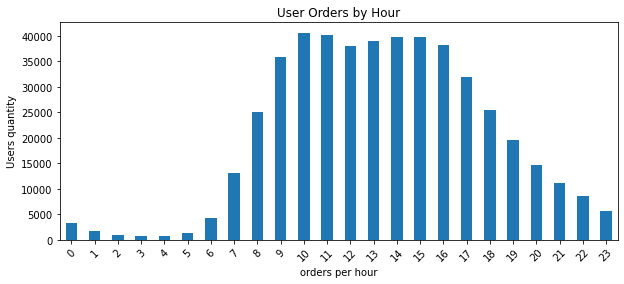

In [38]:
group_per_hour= df_orders['order_hour_of_day'].value_counts().sort_index() #Agrupamos los datos por las horas con el metodo 'value_counts()'
group_per_hour.plot(x='order_hour_of_day', y='user_id', xlim=[0,23], ylabel='Users quantity', xlabel='orders per hour', kind='bar', title='User Orders by Hour', rot=45, figsize=[10, 4], legend=False) #Pasamos los datos agrupados al metodo 'plot()' para realizar nuestra grafica con los datos que necesitamos ver.


plt.show()

Escribe aquí tus conclusiones

La grafica nos muestra que los pedidos de los usuarios se empiezan a generar desde las 7 de la mañana, Hasta las 20 horas (7 de la noche). el la cual podemos evidenciar que la mayor cantidad de pedidos es desde las 10 de la mañana hasta las 16 horas (4 de la tarde). Luego de las 4 de la tarde la cantidad de pedidos empieza a disminuir. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor 16/Abril</b> <a class="tocSkip"></a><br />
Correcto, buena manera de mostrar los resultados y buenas observaciones

</div>


### [A3] ¿Qué día de la semana compran víveres las personas?

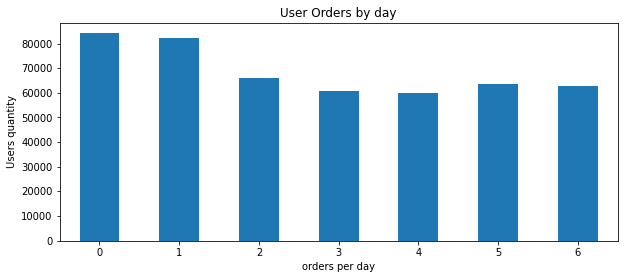

In [39]:
group_per_hour= df_orders['order_dow'].value_counts().sort_index() #Agrupamos los datos por las horas con el metodo 'value_counts()'
group_per_hour.plot(x='order_dow', y='user_id', ylabel='Users quantity', xlabel='orders per day', kind='bar', title='User Orders by day', rot=2, figsize=[10, 4], legend=False) #Pasamos los datos agrupados al metodo 'plot()' para realizar nuestra grafica con los datos que necesitamos ver.


plt.show()

Escribe aquí tus conclusiones

Como podemos observar en la grafica, la mayor cantidad de pedidos mas de 80.000 usuarios se realizan los dias Domingos y le siguen los dias Lunes. Los demas dias de Miercoles a Sabado la cantidad de usuarios que realiza pedidos esta por debajo de los 70.000 usuarios.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto, los domingos son el día preferido de los clientes

</div>


### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

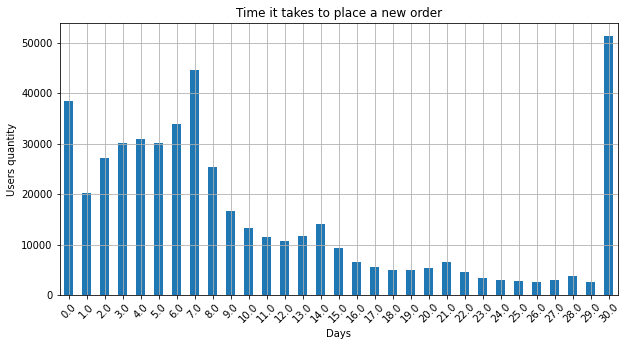

In [41]:
group_per_hour= df_orders['days_since_prior_order'].value_counts().sort_index() #Agrupamos los datos por las horas con el metodo 'value_counts()'
group_per_hour.plot(x='days_since_prior_order', y='user_id', kind='bar', ylabel='Users quantity', xlabel='Days', title='Time it takes to place a new order', rot=45, figsize=[10, 5], legend=False, grid=True) #Pasamos los datos agrupados al metodo 'plot()' para realizar nuestra grafica con los datos que necesitamos ver.


plt.show()

Escribe aquí tus conclusiones

En nuestro grafico obviaremos la columna con valor 0 ya que dicha columna simplemente representa a todos los clientes que realizan su primer pedido en la App. Analizaremos la graficar a partir del dia 1 en adelante.

### Conclusion:

Podemos observar en nuestra grafica que luego de la primera compra los clientes vuelven a comprar los 7 dias posteriores a su primera compra, evidenciandose una mayor cantidad de pedidos al 7mo dia, luego del dia numero 7 se puede evidencias una caida constante de pedidos en la App hasta el dia 29, luego de trancurrido esos 22 dias de bajos pedidos en la App podemos evidencias una gran cantidad de pedidos al dia 30 de mas de 50.000 clientes.  

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Los resultados son correctos
<br />
Hasta este punto no podemos saber si realmente los usuarios esperan 30 días para realizar otra compra o es el sistema el que agrupa todas las compras que sean mayores a 30 días en el día 30. Con la gráfica podemos observar que la mayoría de usuarios se concentra entre 1 y 9 días donde después los números descienden gradualmente
</div>


# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [42]:
order_hour_of_wednesday= df_orders[df_orders['order_dow']== 3] #Filtramos las pedidos por el dia 3 (Miercoles)
order_hour_of_saturday= df_orders[df_orders['order_dow']== 6] #Filtramos las pedidos por el dia 6 (Sabado)
group_wednesday= order_hour_of_wednesday['order_hour_of_day'].value_counts().sort_index() #Agrupamos los datos por las horas con el metodo 'value_counts()'
group_saturday= order_hour_of_saturday['order_hour_of_day'].value_counts().sort_index() #Agrupamos los datos por las horas con el metodo 'value_counts()'
group_days = pd.concat([group_wednesday.rename('wednesday'), group_saturday.rename('Saturday')], axis='columns') #Unimos todos los 2 DataFrames que creamos con el metodo 'concat()' para tener todos los datos de los 2 dias en un solo grafico.

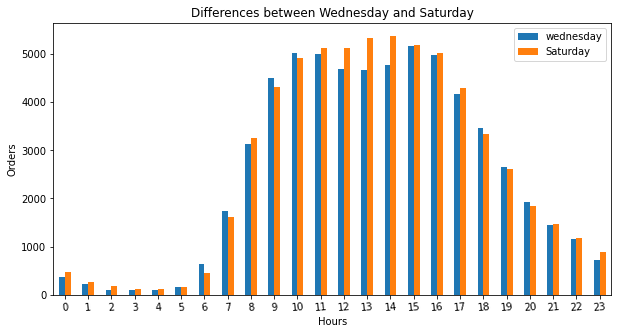

In [43]:
group_days.plot(kind='bar', ylabel='Orders', xlabel='Hours', title='Differences between Wednesday and Saturday', rot=5, figsize=[10, 5]) #Creamos nuestro grafico de barras con los datos unidos.


plt.show()

Escribe aquí tus conclusiones

Las Diferencias que puedo notar es que hay mas pedidos los dias Sabados que los dias Miercoles, de igual manera los pedidos se empiezan a generar a partir de las 7 de la mañana siendo las 13 (1 de la tarde) y 14 (2 de la tarde) las horas con mayores pedidos del dia Sabado, en cambio las horas con mayores pedidos los dias domingo son a las 10, 11 de la mañana y a las 15 horas (3 de la tarde). 

<div class="alert alert-block alert-success">
<b>Comentario del revisor 16/Abril</b> <a class="tocSkip"></a><br />
Correcto, buena manera de combinar ambos días en la misma gráfica, buenas observaciones
</div>



### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [44]:
group_order_number= df_orders['order_number'].value_counts().sort_index() #Agrupamos los datos por el numero de orden con el metodo 'value_counts()'

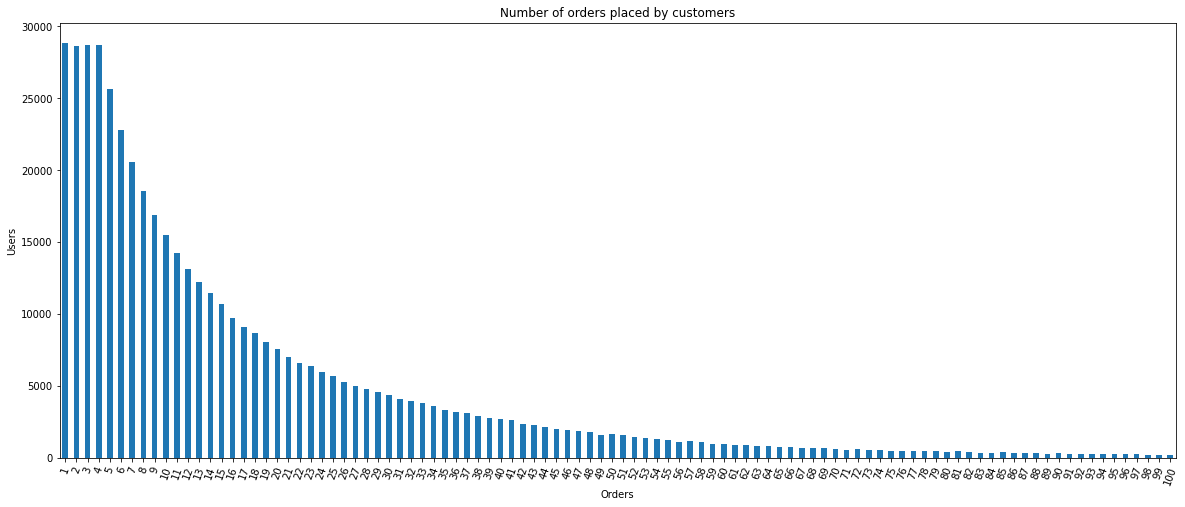

In [45]:
group_order_number.plot(x='order_number', y='user_id', kind='bar', ylabel='Users', xlabel='Orders', title='Number of orders placed by customers', rot=70, figsize=[20, 8], legend=False) #Pasamos los datos agrupados al metodo 'plot()' para realizar nuestra grafica con los datos que necesitamos ver.

plt.show()

Escribe aquí tus conclusiones

Podemos evidenciar una decaidad en las ordenes de los clientes a partir de la 4ta orden, por lo que puede ser un indicio de que los clientes despues de su 4to pedido empiezan a dejar de comprar en la App, o puede ser tambien que los datos que tenemos la mayoria de los clientes son relativamente recientes, por lo cual se tendria que realizar un nuevo estudio mas adelante para ver si los datos han cambiado en la cantidad de pedidos de los clientes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto, buena manera de mostrar los resultados, los usuarios no tienen tantos pedidos, esto nos ayudaría a encontrar una manera de tratar de hacer que compren más seguido
</div>


### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [46]:
popular_products= df_orders_products.merge(df_products, on='product_id', how='outer') #Agrupamos los DataFrame 'df_orders_products', 'df_products' con el metodo 'merge()'.

In [47]:
filtered_popular_products= popular_products[['product_id', 'product_name', 'add_to_cart_order']] #Filtramos el nuevo DataFrame para que solo aparezcan las columnas que nos interesan.  

In [48]:
filtered_popular_products.groupby('add_to_cart_order') #Agrupamos todo el DataFrame por la columna add_to_cart_order'
filtered_popular_products[['product_id', 'product_name']].value_counts().head(20) #Imprimimos solo 20 productos con el metodo 'head()' y le agregamos el metodo 'Value_counts()' para que nos agrupe los productos con sus id y nos muestre los productos mas populares en la App.

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
dtype: int64

Escribe aquí tus conclusiones

Como podemos ver el producto mas popular son las Bananas tambien otras frutas, y a simple viste podemos notar que son la mayoria de los productos organicos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto, los usuarios tienden a comprar productos orgánicos
</div>



# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [49]:
quantity_per_order= df_orders_products.merge(df_orders, on='order_id', how='outer') #Agrupamos los DataFrame 'df_orders_products', 'df_orders' con el metodo 'merge()'.

In [50]:
filtered_quantity_per_order= quantity_per_order[['add_to_cart_order','user_id', 'order_id', 'order_number']] #Filtramos el nuevo DataFrame para que solo aparezcan las columnas que nos interesan.
filtered_quantity_per_order.head(20) #Mostramos solo 20 lineas que equivalen a 1 pedido de 1 usuario en especifico en este caso el usuario '58454'

,add_to_cart_order,user_id,order_id,order_number
0,17.0,58454,2141543,25
1,15.0,58454,2141543,25
2,9.0,58454,2141543,25
3,20.0,58454,2141543,25
4,2.0,58454,2141543,25
5,18.0,58454,2141543,25
6,14.0,58454,2141543,25
7,12.0,58454,2141543,25
8,8.0,58454,2141543,25
9,5.0,58454,2141543,25


In [51]:
print('Cantidad media de articulos en cada pedido: ', round(quantity_per_order['add_to_cart_order'].mean())) #sacamos la media de articulos comprados por los clientes de la columna 'add_to_cart_order' y utilizamos el metodo (round()) simplemente para redondar la cantidad media de articulos por pedido.

Cantidad media de articulos en cada pedido:  9


Escribe aquí tus conclusiones

Con nuestros datos obtenidos podemos evidenciar que la cantidad media de articulos comprados por los clientes es de 9 articulos por pedido. y la distribucion en la que se agrega cada articulo en el carrito de comprar es de 1 + 1 como lo podemos ver en el recuadro de arriba que va desde 1 hasta el 19. El cual el numero 19 es el total de articulos que ese usuario agrego a su carrito de compras para su pedido numero 25.

<div class="alert alert-block alert-success">
<b>Comentario del revisor 16/Abril</b> <a class="tocSkip"></a><br />
Correcto, los usuarios tienden a comprar menos de 10 productos
</div>



### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [52]:
quantity_of_products= df_orders_products.merge(df_products, on='product_id', how='outer') #Agrupamos los DataFrame 'df_orders_products', 'df_products' con el metodo 'merge()'.

In [53]:
reordered = quantity_of_products[quantity_of_products['reordered']== 1] #Filtramos nuestro nuevo DataFrama para que solo nos nuestre los datos donde la columna ''reordered' es igual a 1. 

In [54]:
group_reordered= reordered[['product_name', 'product_id']].value_counts() #Filtramos los datos para que solo nos muestre las columna que nos interesan y le aplicamos el metodo value_counts() para que nos agrupe los datos 

In [55]:
group_reordered.head(20) #Mostramos solos los primeros 20 articulos que vuelven a pedir los clientes con el metodo head().

product_name              product_id
BANANA                    24852         55763
BAG OF ORGANIC BANANAS    13176         44450
ORGANIC STRAWBERRIES      21137         28639
ORGANIC BABY SPINACH      21903         26233
ORGANIC HASS AVOCADO      47209         23629
ORGANIC AVOCADO           47766         18743
ORGANIC WHOLE MILK        27845         16251
LARGE LEMON               47626         15044
ORGANIC RASPBERRIES       27966         14748
STRAWBERRIES              16797         13945
LIMES                     26209         13327
ORGANIC YELLOW ONION      22935         11145
ORGANIC GARLIC            24964         10411
ORGANIC ZUCCHINI          45007         10076
CUCUMBER KIRBY            49683          9538
ORGANIC FUJI APPLE        28204          8989
APPLE HONEYCRISP ORGANIC  8277           8836
ORGANIC BLUEBERRIES       39275          8799
ORGANIC LEMON             5876           8412
ORGANIC HALF & HALF       49235          8389
dtype: int64

Escribe aquí tus conclusiones

Podemos observar nuevamente que los productos que se vuelven a comprar por los clientes son las bananas, algunas frutas y productos organicos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto, nuevamente los productos orgnánicos estan en el top de la lista
</div>


### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [56]:
order_new= df_orders_products.merge(df_orders, on='order_id', how='outer') #Agrupamos los DataFrame 'df_orders_products', 'df_orders' con el metodo 'merge()'.
first_product_order= order_new[(order_new['reordered'] == 0) & (order_new['user_id'].value_counts())].count() #Agrupamos los datos solo por los articulos que se han pedido por primera vez. Utilizamos el metodo value_counts() para agrupar los datos por los valores unicos de 'user_id'
first_product_order['reordered']

33699

In [57]:
second_product_order= order_new[(order_new['reordered'] == 1) & (order_new['user_id'].value_counts())].count() #Agrupamos los datos solo por los articulos que ya se han pedido anteriormente. Utilizamos el metodo value_counts() para agrupar los datos por los valores unicos de 'user_id'
second_product_order['reordered']

49554

In [58]:
order_repetition_rate= (first_product_order['reordered']/second_product_order['reordered'])*100 #Calculamos la tasa de articulos que se han pedido y que se vuelven a pedir. 
print(round(order_repetition_rate, 2),'%') #imprimimos el resultado redondeando

68.0 %


Escribe aquí tus conclusiones

El 68% de los articulos se han vuelto a pedir por los usuarios.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Aquí normalemente lo que se resuelve en este ejercicio es calcular la tasa de repetición de cada producto (calculada individualment), de cualquier manera me parece interesante la manera en que resolviste el ejercicio, bien hecho
</div>


### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [59]:
second_product_order_2= order_new[(order_new['reordered'] == 1) & (order_new['user_id'].value_counts())].count()  #Agrupamos los datos solo por los articulos que ya se han pedido anteriormente. Utilizamos el metodo value_counts() para agrupar los datos por los valores unicos de 'user_id'
second_product_order_2['reordered']

49554

In [60]:
total_users= order_new['user_id'].value_counts().count() #Selecionamos la columna 'user_id' la cual contiene el numero total de usuarios y le aplicamos el metodo 'value_counts()' para solo contabilice los valores unicos en la columna 'user_id' 
total_users

157437

In [61]:
repetition_rate= (second_product_order_2['reordered']/total_users)*100 #Calculamos la tasa de articulos que ya se habian pedido por un cliente.
print(round(repetition_rate, 2),'%')

31.48 %


Escribe aquí tus conclusiones

El 31.48% de los productos que pidió el cliente ya los había pedido en ordenes anteriores.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto, la baja tasa de repetición se puede deber a que los usuarios han hecho pocas compras
</div>


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [62]:
quantity_main_articles= df_orders_products.merge(df_products, on='product_id', how='outer') #Agrupamos los DataFrame 'df_orders_products', 'df_products' con el metodo 'merge()'.
main_articles= quantity_main_articles[quantity_main_articles['add_to_cart_order']== 1] #Filtramos el DataFrame para que solo nos muestre el primer articulo que cada cliente agrega a su carrito de compras.

In [63]:
group_main_articles= main_articles[['product_name', 'product_id', 'add_to_cart_order']].value_counts() #Agrupamos el DataFrames para que solo nos muestre las columnas que nos interesan y utilizamos el metodo value_counts() para agrupe los datos por cada valor unico.

In [64]:
group_main_articles.head(20) #Imprimimos los principales 20 articulos que las personas agregan a sus carritos de compras.

product_name                 product_id  add_to_cart_order
BANANA                       24852       1.0                  15562
BAG OF ORGANIC BANANAS       13176       1.0                  11026
ORGANIC WHOLE MILK           27845       1.0                   4363
ORGANIC STRAWBERRIES         21137       1.0                   3946
ORGANIC HASS AVOCADO         47209       1.0                   3390
ORGANIC BABY SPINACH         21903       1.0                   3336
ORGANIC AVOCADO              47766       1.0                   3044
SPRING WATER                 19660       1.0                   2336
STRAWBERRIES                 16797       1.0                   2308
ORGANIC RASPBERRIES          27966       1.0                   2024
SPARKLING WATER GRAPEFRUIT   44632       1.0                   1914
ORGANIC HALF & HALF          49235       1.0                   1797
LARGE LEMON                  47626       1.0                   1737
SODA                         196         1.0             

Escribe aquí tus conclusiones

Como podemos observas las bananas siguen siendo el primer articulo preferido de los clientes, tambien varios productos organicos, otras frutas, Soda, HALF & HALF entre otros articulos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto, una vez más se comprueba que los productos orgánicos son los favoritos de los clientes.<br/>
</div>


### Conclusion general del proyecto:

Luego de todos nuestros Analisis de los datos proporcionados por la empresa Instacart. Podemos concluir que:

#### Las mejores horas de pedidos:

Los pedidos de los usuarios se empiezan a generar desde las 7 de la mañana, Hasta las 20 horas (7 de la noche). el la cual podemos evidenciar que la mayor cantidad de pedidos es desde las 10 de la mañana hasta las 16 horas (4 de la tarde). Luego de las 4 de la tarde la cantidad de pedidos empieza a disminuir.

#### ¿Que dias compran viveres los cliente?:

la mayor cantidad de pedidos mas de 80.000 usuarios, se realizan los dias Domingos y le siguen los dias Lunes. Los demas dias de Miercoles a Sabado la cantidad de usuarios que realiza pedidos esta por debajo de los 70.000 usuarios.

#### ¿Cual es la cantidad de tiempo esperan las personas hasta hacer otro pedido?:

luego de la primera compra los clientes vuelven a comprar los 7 dias posteriores a su primera compra, evidenciandose una mayor cantidad de pedidos al 7mo dia, luego del dia numero 7 se puede evidenciar tambien una caida constante de pedidos en la App hasta el dia 29, luego de trancurrido esos 22 dias de bajos pedidos, podemos ver una gran cantidad de pedidos al dia 30 de mas de 50.000 clientes.

#### Diferencia entre los dias miércoles y sábados:

Las Diferencias que puedo notar es que hay mas pedidos los dias Sabados que los dias Miercoles, de igual manera los pedidos se empiezan a generar a partir de las 7 de la mañana siendo las 13 (1 de la tarde) y 14 (2 de la tarde) las horas con mayores pedidos del dia Sabado, en cambio las horas con mayores pedidos los dias domingo son entre las 10 y 11 de la mañana y luego a las 15 horas (3 de la tarde).

#### ¿Cuál es la distribución para el número de pedidos por cliente?:

Podemos evidenciar una decaidad en las ordenes de los clientes a partir de la 4ta orden, por lo que puede ser un indicio de que los clientes despues de su 4to pedido empiezan a dejar de comprar en la App, o puede ser tambien que los datos que tenemos la mayoria de los clientes son relativamente recientes, por lo cual se tendria que realizar un nuevo estudio mas adelante para ver si los datos han cambiado en la cantidad de pedidos de los clientes.

####  los 20 productos más populares:

Los 20 productos mas populares son: 
                            
          product_id  Nombre del producto    Cantidad de pedidos            
          
          24852       BANANA                      66050
          13176       BAG OF ORGANIC BANANAS      53297
          21137       ORGANIC STRAWBERRIES        37039
          21903       ORGANIC BABY SPINACH        33971
          47209       ORGANIC HASS AVOCADO        29773
          47766       ORGANIC AVOCADO             24689
          47626       LARGE LEMON                 21495
          16797       STRAWBERRIES                20018
          26209       LIMES                       19690
          27845       ORGANIC WHOLE MILK          19600
          27966       ORGANIC RASPBERRIES         19197
          22935       ORGANIC YELLOW ONION        15898
          24964       ORGANIC GARLIC              15292
          45007       ORGANIC ZUCCHINI            14584
          39275       ORGANIC BLUEBERRIES         13879
          49683       CUCUMBER KIRBY              13675
          28204       ORGANIC FUJI APPLE          12544
          5876        ORGANIC LEMON               12232
          8277        APPLE HONEYCRISP ORGANIC    11993
          40706       ORGANIC GRAPE TOMATOES      11781
       
 #### ¿Cuántos artículos compran normalmente las personas en un pedido?:
 
 la cantidad media de articulos comprados por los clientes es de 9 articulos por pedido.
 
 ####  los 20 principales artículos que vuelven a pedirse con mayor frecuencia:
 
 Los 20 productos que vuelven a pedirse son:
 
          Nombre del Producto     product_id    Cantidades que se vuelven a pedir
         
          BANANA                    24852         55763
          BAG OF ORGANIC BANANAS    13176         44450
          ORGANIC STRAWBERRIES      21137         28639
          ORGANIC BABY SPINACH      21903         26233
          ORGANIC HASS AVOCADO      47209         23629
          ORGANIC AVOCADO           47766         18743
          ORGANIC WHOLE MILK        27845         16251
          LARGE LEMON               47626         15044
          ORGANIC RASPBERRIES       27966         14748
          STRAWBERRIES              16797         13945
          LIMES                     26209         13327
          ORGANIC YELLOW ONION      22935         11145
          ORGANIC GARLIC            24964         10411
          ORGANIC ZUCCHINI          45007         10076
          CUCUMBER KIRBY            49683          9538
          ORGANIC FUJI APPLE        28204          8989
          APPLE HONEYCRISP ORGANIC  8277           8836
          ORGANIC BLUEBERRIES       39275          8799
          ORGANIC LEMON             5876           8412
          ORGANIC HALF & HALF       49235          8389
          

#### Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?:

Luego de nuestros analisis llegamos a la conclusion de que el 68% de los articulos se han vuelto a pedir por los usuarios.


#### Para cada cliente, ¿qué proporción de sus productos ya los había pedido?:

Luego de nuestros analisis llegamos a la conclusion de que el 31.48% de los productos que vuelven a pedir los clientes ya los había pedido en ordenes anteriores.


#### ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?:

Los 20 articulos que los clientes agregan de primero en sus carritos de compras son:

          Nombre del producto          product_id      Carrito de Compras      Cantidad/Agrego
            
            BANANA                       24852                1.0                  15562
            BAG OF ORGANIC BANANAS       13176                1.0                  11026
            ORGANIC WHOLE MILK           27845                1.0                   4363
            ORGANIC STRAWBERRIES         21137                1.0                   3946
            ORGANIC HASS AVOCADO         47209                1.0                   3390
            ORGANIC BABY SPINACH         21903                1.0                   3336
            ORGANIC AVOCADO              47766                1.0                   3044
            SPRING WATER                 19660                1.0                   2336
            STRAWBERRIES                 16797                1.0                   2308
            ORGANIC RASPBERRIES          27966                1.0                   2024
            SPARKLING WATER GRAPEFRUIT   44632                1.0                   1914
            ORGANIC HALF & HALF          49235                1.0                   1797
            LARGE LEMON                  47626                1.0                   1737
            SODA                         196                  1.0                   1733
            ORGANIC REDUCED FAT MILK     38689                1.0                   1397
            LIMES                        26209                1.0                   1370
            HASS AVOCADOS                12341                1.0                   1340
            ORGANIC REDUCED FAT 2% MILK  5785                 1.0                   1310
            HALF & HALF                  27086                1.0                   1309
            RASPBERRIES                  43352                1.0                   1246

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un gran trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, las conclusiones a las que llegaste son buenas y los procedimientos realizados son correctos, este es un ejercicio que se asemeja bastante a algunas tareas reales que se hacen en las empresas, estos análisis son muy útiles para crear nuevas estrategias de marketing o para hacer los procesos en el almacén más eficientes.
    
    
Te felicito por haber mostrado los resultados en esta última sección de 'conclusiones', poner un resumen de esta manera es algo que se aprecia mucho, personalmente pienso que hacer el código es solo la mitad del trabajo, la otra mitad que es igual de importante es saber mostrar los resultados y que las demás personas (sobre todo las que no tienen conocimientos tecnicos) puedan entender e interpretar los resultados.<br/>
    
    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!


</div>
